# EDA Master

Students:
Firat Saritas, Simon Stähli

In [2]:
# Import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
from matplotlib.offsetbox import AnchoredText
import missingno 

sns.set_style('white')

Exploratory data analysis is about familiarizing yourself with the data. Let's import the dataset and see what shape we have and check a row of the dataset:

In [3]:
# Import Dataframe
df = pd.read_csv('../data/immo_dev_data.csv')
print('Shape of Dataframe:',df.shape)
df.sample()

Shape of Dataframe: (153627, 69)


,Id,AreaLiving,AreaProperty,BuiltYear,FloorNumber,ForestDensityL,ForestDensityM,ForestDensityS,GroupNameDe,HouseObject,...,gde_private_apartments,gde_social_help_quota,gde_tax,gde_workers_sector1,gde_workers_sector2,gde_workers_sector3,gde_workers_total,location_has_street,location_is_complete,PurchasePrice
147153,40521047,133.0,0.0,2017,2.0,0.341172,0.121417,0.0,Wohnung,False,...,623.0,1.204819,4.11,62.0,122.0,194.0,378.0,1,0,875000.0


This information tells us, that we have 153627 properties with 69 attributes in our dataset.

## 1. Describe Dataframe

Next we want to see some basic statistical details like percentile, mean, std etc. of the dataset and we want to see the types of each column

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.describe(include="all")

,Id,AreaLiving,AreaProperty,BuiltYear,FloorNumber,ForestDensityL,ForestDensityM,ForestDensityS,GroupNameDe,HouseObject,LastUpdate,Latitude,Locality,Longitude,Name,NoisePollutionRailwayL,NoisePollutionRailwayM,NoisePollutionRailwayS,NoisePollutionRoadL,NoisePollutionRoadM,NoisePollutionRoadS,PopulationDensityL,PopulationDensityM,PopulationDensityS,RealEstateTypeId,Renovationyear,RiversAndLakesL,RiversAndLakesM,RiversAndLakesS,Rooms,SourceId,StateShort,StreetAndNr,TravelTimeMiv,WorkplaceDensityL,WorkplaceDensityM,WorkplaceDensityS,Zip,distanceToTrainStation,gde_area_agriculture_percentage,gde_area_forest_percentage,gde_area_nonproductive_percentage,gde_area_settlement_percentage,gde_average_house_hold,gde_empty_apartments,gde_foreigners_percentage,gde_new_homes_per_1000,gde_politics_bdp,gde_politics_cvp,gde_politics_evp,gde_politics_fdp,gde_politics_glp,gde_politics_gps,gde_politics_pda,gde_politics_rights,gde_politics_sp,gde_politics_svp,gde_pop_per_km2,gde_population,gde_private_apartments,gde_social_help_quota,gde_tax,gde_workers_sector1,gde_workers_sector2,gde_workers_sector3,gde_workers_total,location_has_street,location_is_complete,PurchasePrice
count,1.536270e+05,153627.000000,153627.000000,153627.000000,65932.000000,153627.000000,153627.000000,153627.000000,153627,153627,153627,153627.000000,153627,153627.000000,153627,153627.000000,153627.000000,153627.000000,153627.000000,153627.000000,153627.000000,153627.000000,153627.000000,153627.000000,153627.000000,15301.000000,153627.000000,153627.000000,153627.000000,153627.000000,153627.000000,153626,107192,153625.000000,153627.000000,153627.000000,153627.000000,153627.000000,153627.000000,153625.000000,153625.000000,153625.000000,153625.000000,153625.000000,153625.000000,153625.000000,153625.000000,120824.000000,148569.000000,124032.000000,150707.000000,135185.000000,142514.000000,61999.000000,123092.000000,151581.000000,152734.000000,153625.000000,153625.000000,153625.000000,153625.000000,153625.000000,153625.000000,153625.00000,153625.000000,153625.000000,153627.000000,153627.000000,1.536270e+05
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2,142024,NaN,3954,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,62151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wohnung,False,2017-12-29 06:46:03,NaN,Zürich,NaN,ComHistory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZH,Dorfstrasse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77499,89794,7,NaN,2074,NaN,71180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20731,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.671412e+07,141.261625,290.945532,1989.006522,12.771659,0.176572,0.111945,0.068862,NaN,NaN,NaN,47.015459,NaN,8.123495,NaN,0.014931,0.014305,0.012943,0.234632,0.257487,0.279608,0.196615,0.272356,0.353082,527.564816,2009.430887,0.032481,0.018142,0.006739,4.962481,22604.327364,NaN,NaN,0.305633,0.089155,0.123072,0.158192,5527.401095,1.650641,37.817874,31.798078,7.005651,23.378397,2.272764,1.737168,23.019706,7.458166,5.433207,13.197502,2.405378,17.798955,4.891035,6.558278,1.156437,3.350902,17.177171,31.293910,921.740019,18719.583941,8709.521797,2.525845,6.023885,104.329803,2080.95627,14054.644029,16239.997982,0.697742,0.619474,9.313495e+05
std,8.290686e+06,61.025164,490.419149,32.543506,105.121187,0.170922,0.156796,0.147892,NaN,NaN,NaN,0.486760,NaN,0.879123,NaN,0.028345,0.036750,0.047570,0.113365,0.120547,0.146322,0.140409,0.170058,0.211971,1371.906477,19.475686,0.078942,0.055764,0.035885,1.855729,10816.455429,NaN,NaN,0.178780,0.105599,0.137547,0.184447,2611.687322,1.878054,17.635363,15.307595,13.603107,18.60

In [12]:
print('5 example where we see the type of each column:')
df.dtypes.head(5)

5 example where we see the type of each column:


Id                int64
AreaLiving      float64
AreaProperty    float64
BuiltYear         int64
FloorNumber     float64
dtype: object

## 2. Missing Data

We would like to know where the missing datas are. For this, we achieve this by using the matrix of the programming library missingno, which is very useful when it comes to a quick overview over the missing values.

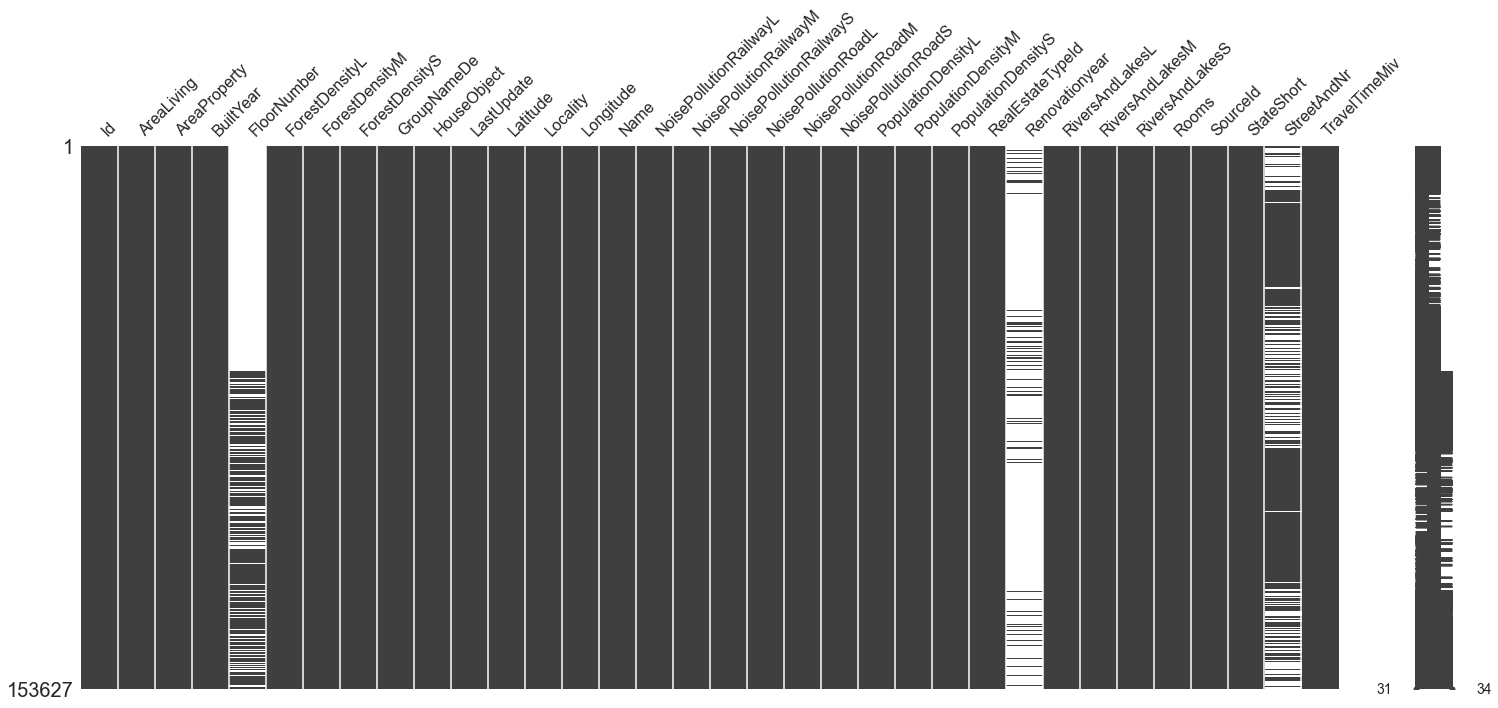

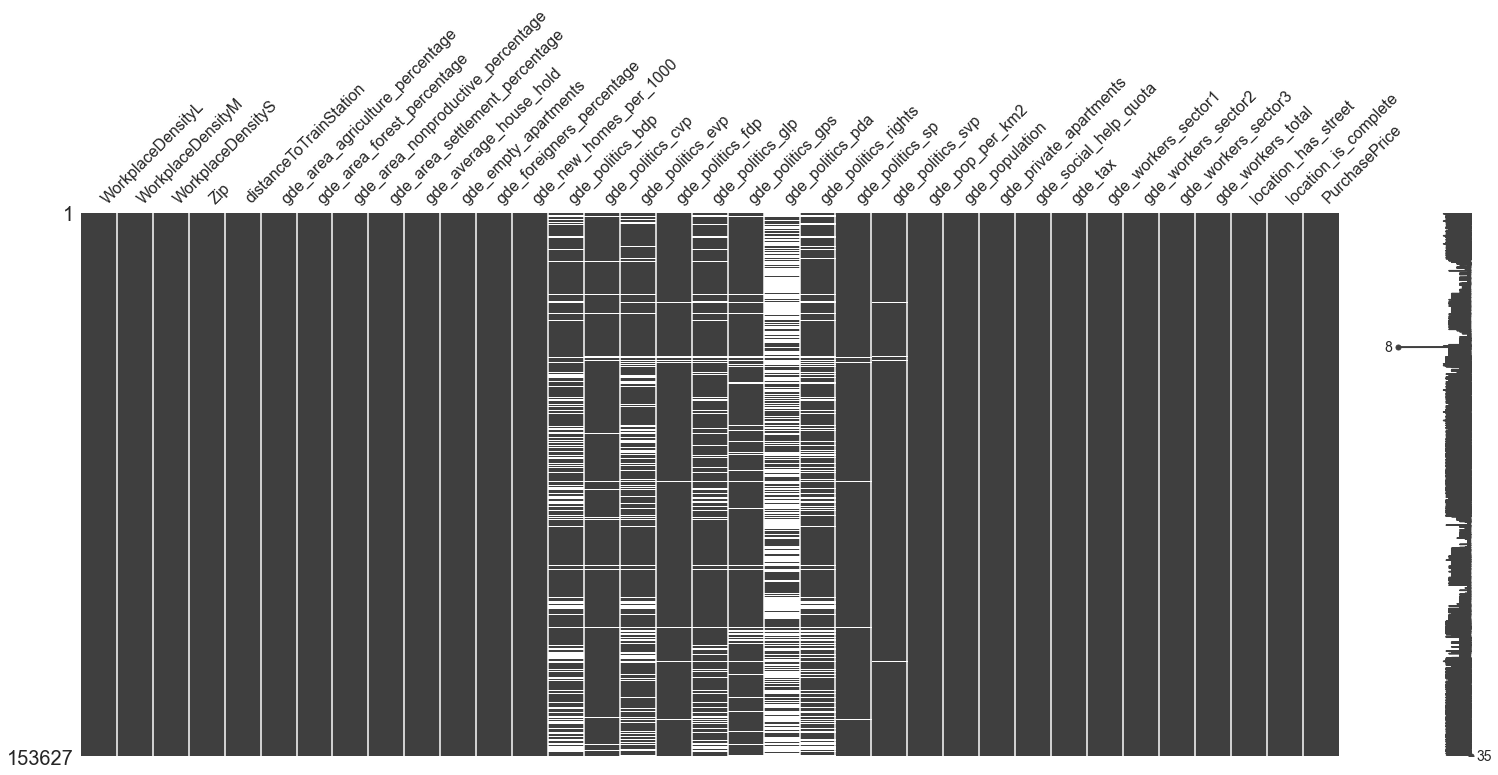

In [14]:
missingno.matrix(df[df.columns[:int(len(df.columns)/2)]])
missingno.matrix(df[df.columns[int(len(df.columns)/2):]])
plt.show()

We can clearly see that missing values are very common in certain columns (MNAR).

For the column "Renovationyear" we have most of the missing data. But we can presume that the rows that have no value there have not been renovated.

## 3. Create a geographic plot

With the help of the latitude and longitude we can see the distribution of the properties on the map.

In [15]:
# Import the image:
swiss_map = plt.imread("./Swiss_map.png")

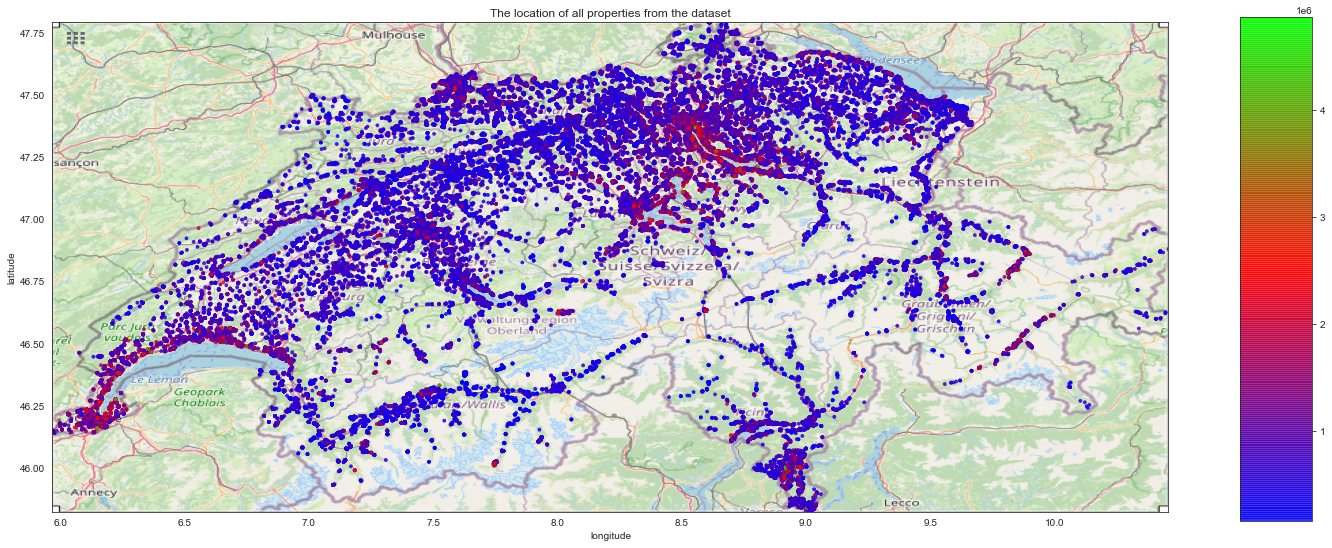

In [16]:
box_range = ((df.Longitude.min(), df.Longitude.max(), df.Latitude.min(), df.Latitude.max()))

fig, ax = plt.subplots(figsize = (20,10))
im = ax.scatter(df.Longitude, df.Latitude, zorder=2, alpha= 0.8, c=df.PurchasePrice, cmap='brg', s=8)
ax.set_title('The location of all properties from the dataset')
ax.set_xlim(box_range[0],box_range[1])
ax.set_ylim(box_range[2],box_range[3])
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
cax = fig.add_axes([0.95, 0.15, 0.05, 0.7]) #position colorbar
ax.imshow(swiss_map, zorder=1, extent = box_range, aspect= 'equal')
fig.colorbar(im, cax=cax, ax=ax)
plt.show()

A very interesting visualization. Here you can clearly see that the prices are rising in the metropolises and at the lakes. We can also see that we have a lot more properties north of Switzerland.

## 3. Attributes classified by sizes S, M, L 

The plot below should show a relation between the different sizes S, M and L of different attributes.

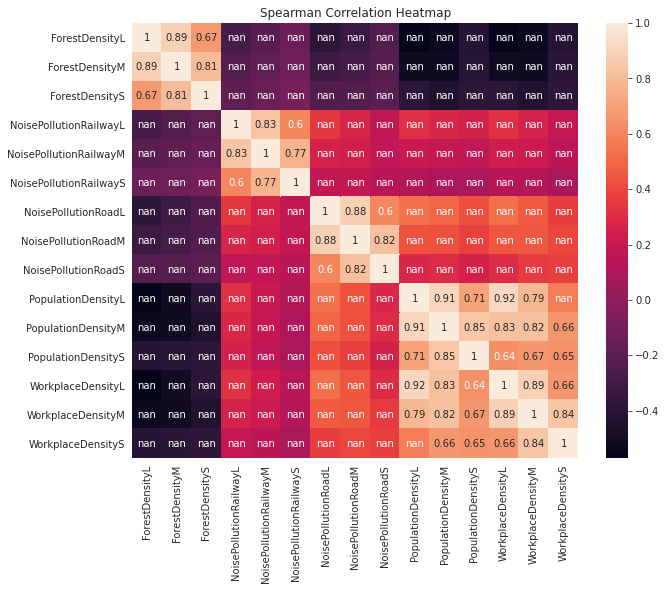

In [5]:
tmp = df[['ForestDensityL', 'ForestDensityM', 'ForestDensityS',
          'NoisePollutionRailwayL', 'NoisePollutionRailwayM','NoisePollutionRailwayS', 
          'NoisePollutionRoadL', 'NoisePollutionRoadM','NoisePollutionRoadS', 
          'PopulationDensityL', 'PopulationDensityM','PopulationDensityS',
         'WorkplaceDensityL', 'WorkplaceDensityM', 'WorkplaceDensityS']].corr(method='spearman')

fig, ax = plt.subplots(1,1, figsize=(10,8))
p = sns.heatmap(tmp, annot=tmp[tmp>0.6])
p.set_title('Spearman Correlation Heatmap')
plt.show()

del tmp

Looks like there is a strong correlation with each other between these classified sizes.

## 4. Built Houses by year

Let's have a look on the timeline when the houses were built and how much of them were built.

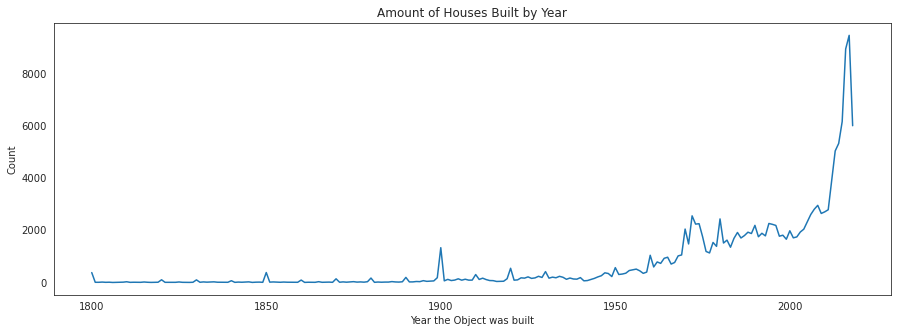

In [6]:
tmp = df.groupby('BuiltYear').count()['Id']

fig, ax = plt.subplots(1,1, figsize=(15,5))
p = sns.lineplot(x=tmp.index, y=tmp)
p.set_title('Amount of Houses Built by Year')
p.set_xlabel('Year the Object was built')
p.set_ylabel('Count')
plt.show()

del tmp

The plot shows the count on the y-axis and the year on the x-axis. It shows a pattern for the most of the houses which were built before 1900. The pattern consists of peaks all 10y. We presume for them that it's just an approximation of the built year. After 1900 the line fits more our expectations.

### Difference Renovation Year to Built Year

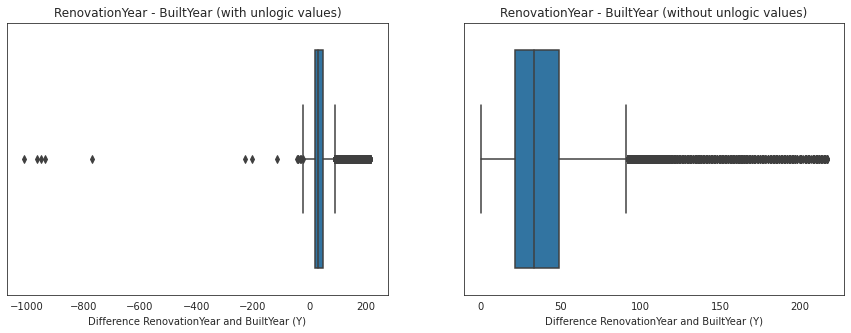

In [7]:
tmp = df[['BuiltYear', 'Renovationyear']]
tmp = tmp[tmp['Renovationyear'].isna() == False]
tmp['diff'] = tmp['Renovationyear'] - tmp['BuiltYear']

fig, ax = plt.subplots(1,2,figsize=(15,5))
p1 = sns.boxplot(tmp['diff'], ax=ax[0])
p2 = sns.boxplot(tmp[~(tmp['diff'] < 0)]['diff'], ax=ax[1])
p1.set_title('RenovationYear - BuiltYear (with unlogic values)')
p2.set_title('RenovationYear - BuiltYear (without unlogic values)')
p1.set_xlabel('Difference RenovationYear and BuiltYear (Y)')
p2.set_xlabel('Difference RenovationYear and BuiltYear (Y)')
plt.show()

del tmp

These two plots show the data of a new generated data column which shows the difference between the Renovation year and the BuiltYear. Logically the RenovationYear can only took place after the BuiltYear. The left plot shows very strong outliers which have been removed for the boxplot on the right side. Additionally boh of the boxplots show upper outliers, but we estimate that these outlier could be possible i.e. a house which was built 200y ago and then renovated is possible.

## 5. Crosstab SourceId and Name

We don't know if the SourceId and the Name belong together. We investigate this by use of the crosstab function of pandas which counts the appearances of each variables in the column and puts them together in a table.

In [8]:
pd.crosstab(df['Name'],df['SourceId'])

SourceId,10000,11000,12000,13000,14000,15000,27000,29000,30000,31000,32000,33000,34000
Name,,,,,,,,,,,,,
ComHistory,0,0,0,0,0,0,0,0,0,0,0,71180,0
Home.ch,0,0,0,0,0,0,3262,0,0,0,0,0,0
Homegate,0,16198,0,0,0,0,0,0,0,0,0,0,0
ICasa,0,0,0,0,0,2501,0,0,0,0,0,0,925
Immoclick,0,0,0,0,0,0,0,12,0,0,0,0,0
Immoscout,0,0,20277,0,0,0,0,0,0,0,0,0,0
Immostreet,0,0,0,0,0,0,0,0,0,487,3546,0,0
Immowelt,0,0,0,0,0,0,0,0,2826,0,0,0,0
NabHome,0,0,0,0,712,0,0,0,0,0,0,0,0


The crosstable shows us that these values belong to each other.

## 6. Rooms

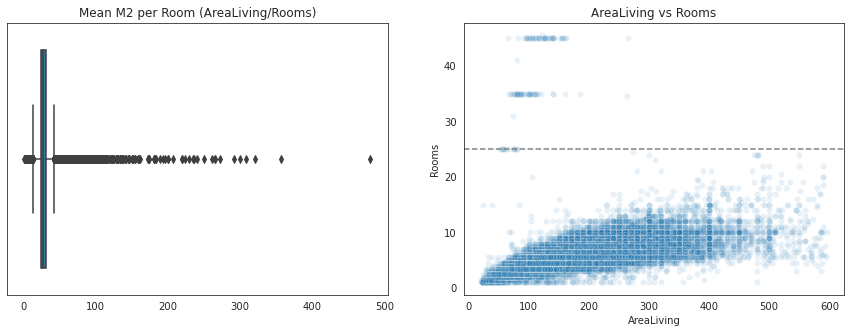

In [9]:
df[df['Rooms'] > 20][['AreaLiving', 'GroupNameDe', 'Rooms']].sample(10)
tmp = df['AreaLiving'] / df['Rooms']

fig, ax = plt.subplots(1,2,figsize=(15,5))

p1 = sns.boxplot(tmp, ax=ax[0])
p1.set_title('Mean M2 per Room (AreaLiving/Rooms)')
                       
p2 = sns.scatterplot(df['AreaLiving'], df['Rooms'], alpha=0.1, ax=ax[1])
p2.axhline(y=25, xmin=0, xmax=600, color='grey', linestyle='--')
p2.set_title('AreaLiving vs Rooms')
plt.show()

del tmp

We have a lot of of outliers in the column Rooms. We wanted to investigate it with the relation to the LivingArea which is also part of the dataframe. The scatterplot shows a trend regarding to AreaLiving vs Rooms. We decided to set a filter for the amount of rooms.

## 7. Spearman Correlation between Purchase Price and other Attributes

The Spearman correlation measures the relationship between two variables. It takes values from +1 (perfect positive correlation) to -1 (perfect negative correlation). And if its close to 0, there is no correlation at all.

In [11]:
list_diff_sizes = ['ForestDensityL', 'ForestDensityM', 'ForestDensityS',
                    'NoisePollutionRailwayL', 'NoisePollutionRailwayM','NoisePollutionRailwayS', 
                    'NoisePollutionRoadL', 'NoisePollutionRoadM','NoisePollutionRoadS', 
                    'PopulationDensityL', 'PopulationDensityM','PopulationDensityS',
                    'WorkplaceDensityL', 'WorkplaceDensityM', 'WorkplaceDensityS']

def fusion_sizes(df):
    """
    """
    tmp = df.copy()

    tmp['ForestDensity'] = tmp[list_diff_sizes[:3]].mean(axis=1)
    tmp = tmp.drop(list_diff_sizes[:3], axis=1)

    tmp['NoisePollutionRailway'] = tmp[list_diff_sizes[3:6]].mean(axis=1)
    tmp = tmp.drop(list_diff_sizes[3:6], axis=1)

    tmp['NoisePollutionRoad'] = tmp[list_diff_sizes[6:9]].mean(axis=1)
    tmp = tmp.drop(list_diff_sizes[6:9], axis=1)

    tmp['PopulationDensity'] = tmp[list_diff_sizes[9:12]].mean(axis=1)
    tmp = tmp.drop(list_diff_sizes[9:12], axis=1)
    
    tmp['WorkplaceDensity'] = tmp[list_diff_sizes[12:15]].mean(axis=1)
    tmp = tmp.drop(list_diff_sizes[12:15], axis=1)
    
    return tmp

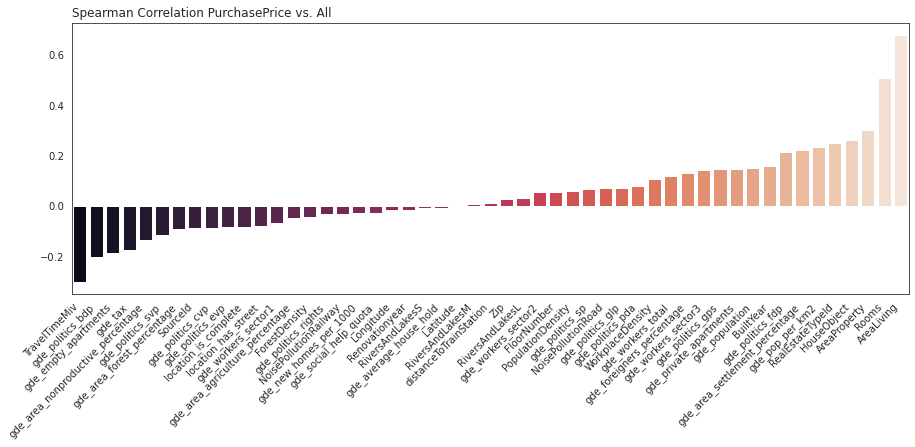

In [12]:
tmp =  fusion_sizes(df)
tmp = tmp.corr(method='spearman')['PurchasePrice'].drop(['Id'])
tmp = tmp[~tmp.index.isin(['PurchasePrice'])]

fig, ax = plt.subplots(1,1, figsize=(15,5))

p = sns.barplot(x=tmp.index, y=tmp.values, order=tmp.sort_values().index, palette='rocket')
p.set_xticklabels(p.get_xticklabels(), rotation=45,
                 horizontalalignment='right')
p.set_title('Spearman Correlation PurchasePrice vs. All', loc='left')

plt.show()

AreaLiving has a very large correlation with PurchasePrice and latitude, for example, has one of the least correlation. TravelTimeMiv has a strong negative correlation.


Let's go over to AreaLiving and AreaProperty and compare them directly to PurchasePrice:

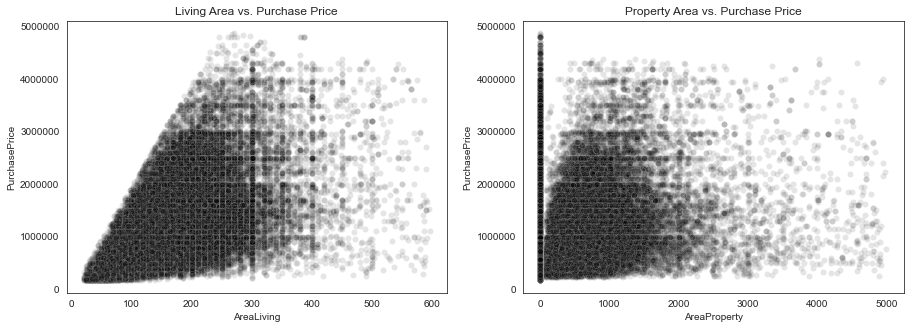

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

p1 = sns.scatterplot(x=df['AreaLiving'], y=df['PurchasePrice'], color='black', alpha=0.1, ax=ax[0])
p1.set_title('Living Area vs. Purchase Price')
p1.ticklabel_format(style='plain')

p2 = sns.scatterplot(x=df['AreaProperty'], y=df['PurchasePrice'], color='black', alpha=0.1, ax=ax[1], )
p2.set_title('Property Area vs. Purchase Price')
p2.ticklabel_format(style='plain')

plt.show()

If we compare AreaLiving and AreaProperty with PurchasePrice, we see two interesting observations:
- In the case of AreaLiving, we see an upper limit for the price for a certain size of AreaLiving.
- at AreaProperty we see a large number of properties in all price classes with an AreaProperty of 0. We assume that this is primarily the apartments and not the Houses.

## 8. Distribution of the Data

Let's have a closer look on the distribution of the data and the count of upper, lower outliers and the count of the NA-Values. For this we created a funciton which is interactive to choose which attribute should be displayed.

##### (Because the output is an interactive visualization, this graphic is not displayed in the PDF.)

In [22]:
def hist_box_plotter(column):
    """
    Function plots a column as histogram and boxplot with the count of all outliers and NA-Values.
    
    param: df
    returns: plots
    """
         
    rows, cols = 1, 2
    fig, ax = plt.subplots(rows, cols, figsize=(15, 5*rows))
    
    q1, q3 = df[column].quantile(0.25), df[column].quantile(0.75)
    outlier_range = 1.5 * (q3 - q1)
    upper_out, lower_out = q3+outlier_range , q1-outlier_range
    count_upper_outlier = df[df[column] >= upper_out].count()[column]
    count_lower_outlier = df[df[column] <= lower_out].count()[column]
    count_na_values = df[df[column].isna() == True].count().values[0]
    
    p1 = sns.histplot(df[column],kde=False,  ax=ax[0])
    at = AnchoredText('Upper Outliers: {} \nLower Outliers: {} \nNA-Values: {}'.format(count_upper_outlier, 
                                                                                               count_lower_outlier, 
                                                                                               count_na_values),
                              prop=dict(size=8), frameon=True,
                              loc='upper right')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        
    p2 = sns.boxplot(x=df[column], ax=ax[1])
    ax[1].add_artist(at)
    plt.show()

int_float_columns = [i for i in df.columns if 'int' in str(type(df[i].values[0])) or 'float' in str(type(df[i].values[0]))]    
for i in ['StreetAndNr', 'location_is_complete', 'location_has_street']: # Remove special cases
    int_float_columns.remove(i)
    
interact(hist_box_plotter, column=int_float_columns)
plt.show()

interactive(children=(Dropdown(description='column', options=('Id', 'AreaLiving', 'AreaProperty', 'BuiltYear',…

## 9. Whats about data which is not int or float? 

Let's see how many there are and which columns this concerns:

In [29]:
df_exclude_float_int = df.select_dtypes(exclude=['float64','int'])
print('Count columns:',len(df_exclude_float_int.columns))
df_exclude_float_int.sample(5)

Count columns: 14


,Id,BuiltYear,GroupNameDe,HouseObject,LastUpdate,Locality,Name,RealEstateTypeId,SourceId,StateShort,StreetAndNr,Zip,location_has_street,location_is_complete
92628,24886996,2013,Wohnung,False,2017-05-30 23:56:32,Aadorf,ComHistory,100,33000,TG,Wiesentalstrasse 30,8355,1,1
8156,17258231,1988,Haus,True,2016-12-02 19:14:13,Villeneuve FR,Immoscout,200,12000,FR,NaN,1527,0,0
130749,31610384,2003,Wohnung,False,2017-09-18 11:10:23,Frick,Newhome,700,10000,AG,NaN,5070,0,0
97654,25392093,2013,Wohnung,False,2017-06-01 19:13:05,Oberrohrdorf,ComHistory,100,33000,AG,Oberdorfstrasse 7,5452,1,1
17780,24653320,1820,Haus,True,2017-05-30 04:03:34,Winterthur,ComHistory,200,33000,ZH,Wiesendangerstrasse 120,8404,1,1


#### How many types of property are there and rom which website comes the ads?

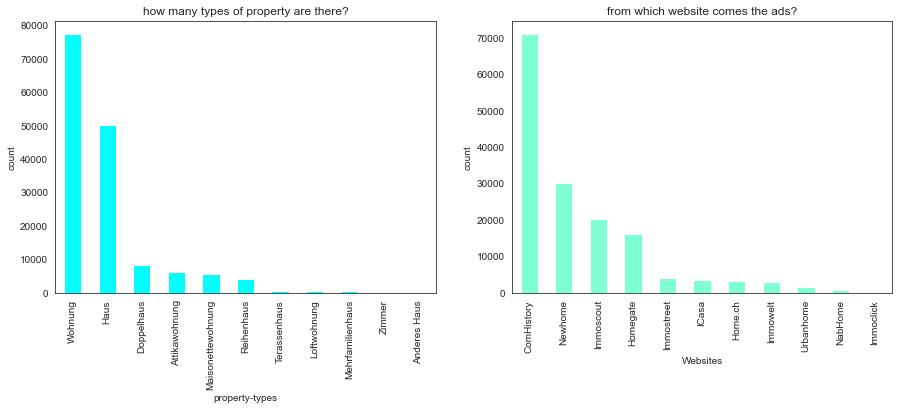

In [10]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

p1 = df['GroupNameDe'].value_counts().plot(kind='bar', ax=ax[0], color= 'aqua')
p1.set_title('Mean M2 per Room (AreaLiving/Rooms)')
p1.set_xlabel("property-types")
p1.set_ylabel("count")
p1.set_title("how many types of property are there?")

p2 = df['Name'].value_counts().plot(kind='bar', ax=ax[1], color= 'aquamarine')
p2.set_title('Mean M2 per Room (AreaLiving/Rooms)')
p2.set_xlabel("Websites")
p2.set_ylabel("count")
p2.set_title("from which website comes the ads?")
plt.show()


From these two diagrams we can see:
- There is by far a wide range of houses and apartments.
- Most properties come from the immoscout and homegate websites.
- We also see that twice as many properties are old offers.

## 10. Summary

Through this small analysis of the data, we were able to read out a lot of information. We have many attributes per property and among them there are missing values as well as incorrect values. these must be found and dealt with.
In addition, some information is repeated and this could possibly be removed.
Finally, we can say that we definitely need a processing phase for the data before we can train it with a regression model.

## 11. Sources

**Notebooks:**

Simon Staehli, S. S. (2020). EDA_Simon.ipynb [Jupyter Notebook]. Simon Staehli.

Firat Saritas, F. S. (2020). EDA_Firat.ipynb [Jupyter Notebook]- Firat Saritas.